In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datapreprocessing import df_final
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df_visu = df_final.copy()

In [3]:
df_visu.head()

,nom_dep,Moins de 20 ans,Moins de 25 ans,25 à 64 ans,65 ans ou plus,75 ans ou plus,80 ans ou plus,85 ans ou plus,pop_totale,Moins de 20 ans.1,Moins de 25 ans.1,25 à 64 ans.1,65 ans ou plus.1,75 ans ou plus.1,80 ans ou plus.1,85 ans ou plus.1,nb hospitalisations,nb deces,espérance de vie,passage_urg_corona,nb_etab_sante,esp_de_vie_H_60,esp_de_vie_F_60,esp_de_vie_H_65,esp_de_vie_F_65,rapport nv_vie interdécile D9/D1,indicateur pauvreté 1,indicateur pauvreté 2,patients positifs,patients testés,ratio patients positifs/population,ratio patients positifs/testés,ratio patients testés/population,ratio population/etab
num_dep,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01,Ain,171336.0,203449.0,344459.0,131590.0,61926.0,35163.0,18688.0,679498.0,25.215085,29.941074,50.693159,19.365767,9.113493,5.174850,2.750266,5924,874,71.9,3176.0,214,24.4,27.9,20.3,23.4,3.5,20.4,18.2,392838.0,2601627.0,57.812974,15.099705,382.874858,3175.224299
02,Aisne,125708.0,152860.0,251931.0,116841.0,53128.0,29580.0,16774.0,521632.0,24.098982,29.304184,48.296692,22.399124,10.184958,5.670664,3.215677,10705,1647,86.0,4350.0,230,21.9,26.3,18.2,21.9,3.1,20.1,20.3,272177.0,1932208.0,52.177972,14.086320,370.415925,2267.965217
03,Allier,66246.0,81986.0,152745.0,97977.0,49747.0,29925.0,17424.0,332708.0,19.911153,24.642028,45.909626,29.448345,14.952150,8.994373,5.237025,7585,977,139.2,2568.0,164,23.1,27.2,19.4,23.0,3.0,20.1,21.0,174112.0,1273660.0,52.331774,13.670210,382.816163,2028.707317
04,Alpes-de-Haute-Provence,33920.0,40903.0,80162.0,47096.0,23412.0,13630.0,7259.0,168161.0,20.171146,24.323714,47.669793,28.006494,13.922372,8.105328,4.316696,3484,399,128.9,1780.0,98,24.1,27.7,20.0,23.3,3.2,20.5,19.9,99411.0,807426.0,59.116561,12.312088,480.150570,1715.928571
05,Hautes-Alpes,27874.0,33506.0,68377.0,39778.0,19651.0,11323.0,6406.0,141661.0,19.676552,23.652240,48.268048,28.079711,13.871849,7.993026,4.522063,3710,412,124.9,1676.0,87,24.4,28.6,20.4,24.2,3.0,19.9,19.6,82765.0,593457.0,58.424690,13.946251,418.927581,1628.287356


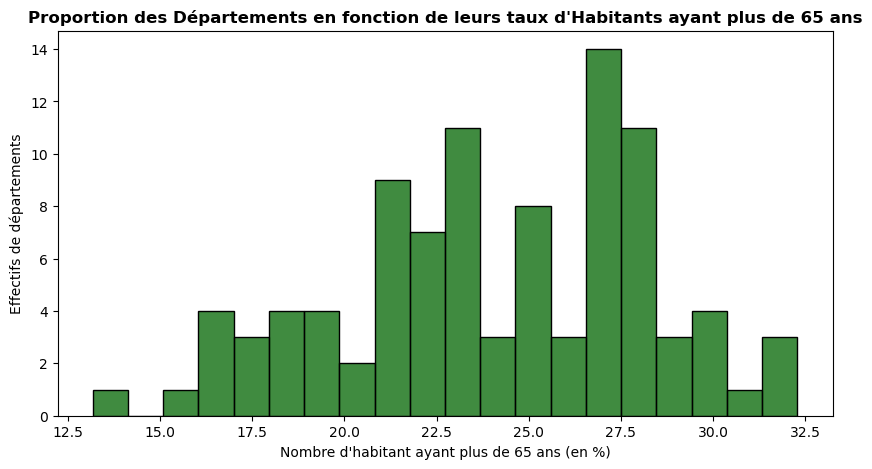

In [23]:
plus_de_65 = df_visu["65 ans ou plus.1"]
plt.figure(figsize=(10,5))
ax = sns.histplot(plus_de_65, bins=20, kde=None, color="darkgreen")
plt.title("Proportion des Départements en fonction de leurs taux d'Habitants ayant plus de 65 ans", fontweight="bold")
plt.xlabel("Nombre d\'habitant ayant plus de 65 ans (en %)")
plt.ylabel("Effectifs de départements")

plt.show()

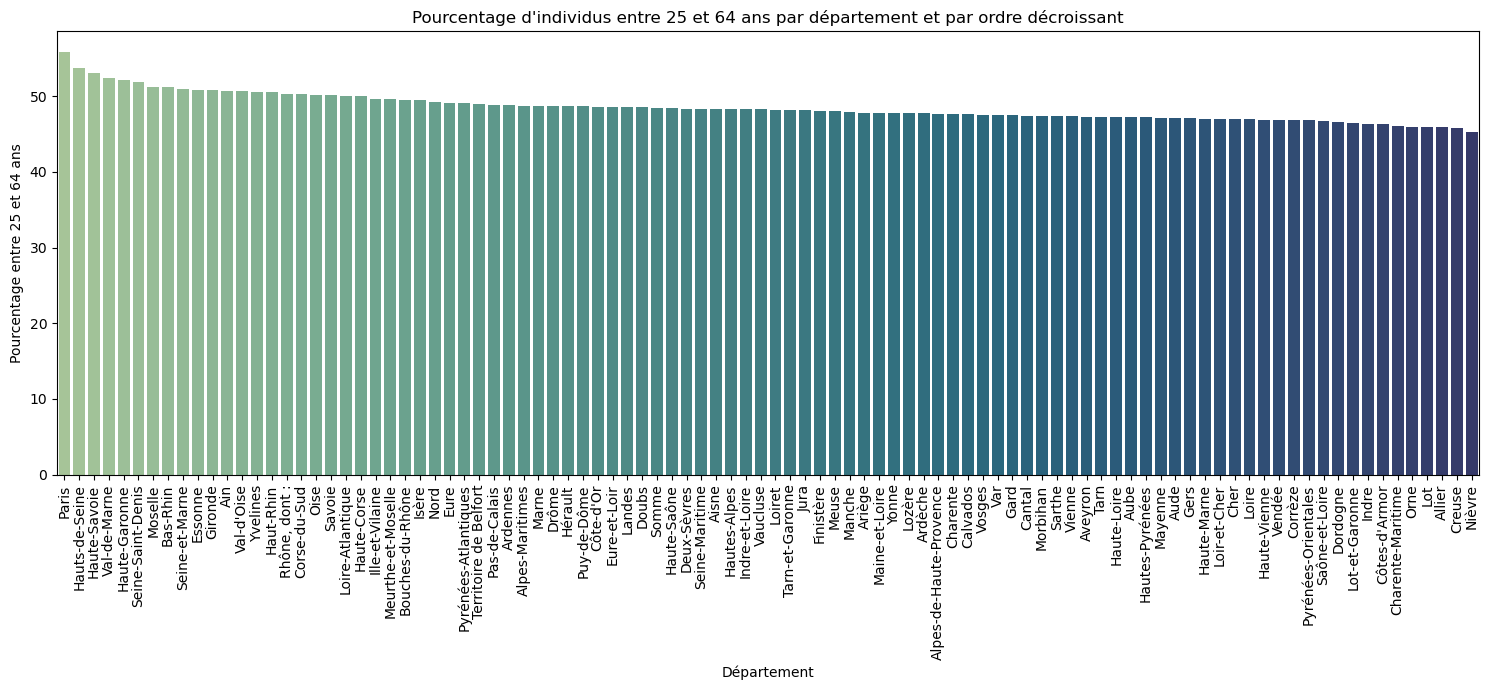

In [5]:
"""On regarde la fréquence des départements en fonction du taux la population de 25 à 64 ans """
sorted_df = df_visu.sort_values(by="25 à 64 ans.1", ascending=False)


plt.figure(figsize=(15, 7))
sns.barplot(x='nom_dep', y='25 à 64 ans.1', data=sorted_df, palette='crest')
plt.xticks(rotation=90)#pour que l'on voit les noms des départements
plt.title('Pourcentage d\'individus entre 25 et 64 ans par département et par ordre décroissant')
plt.xlabel('Département')
plt.ylabel('Pourcentage entre 25 et 64 ans')
plt.tight_layout()
plt.show()

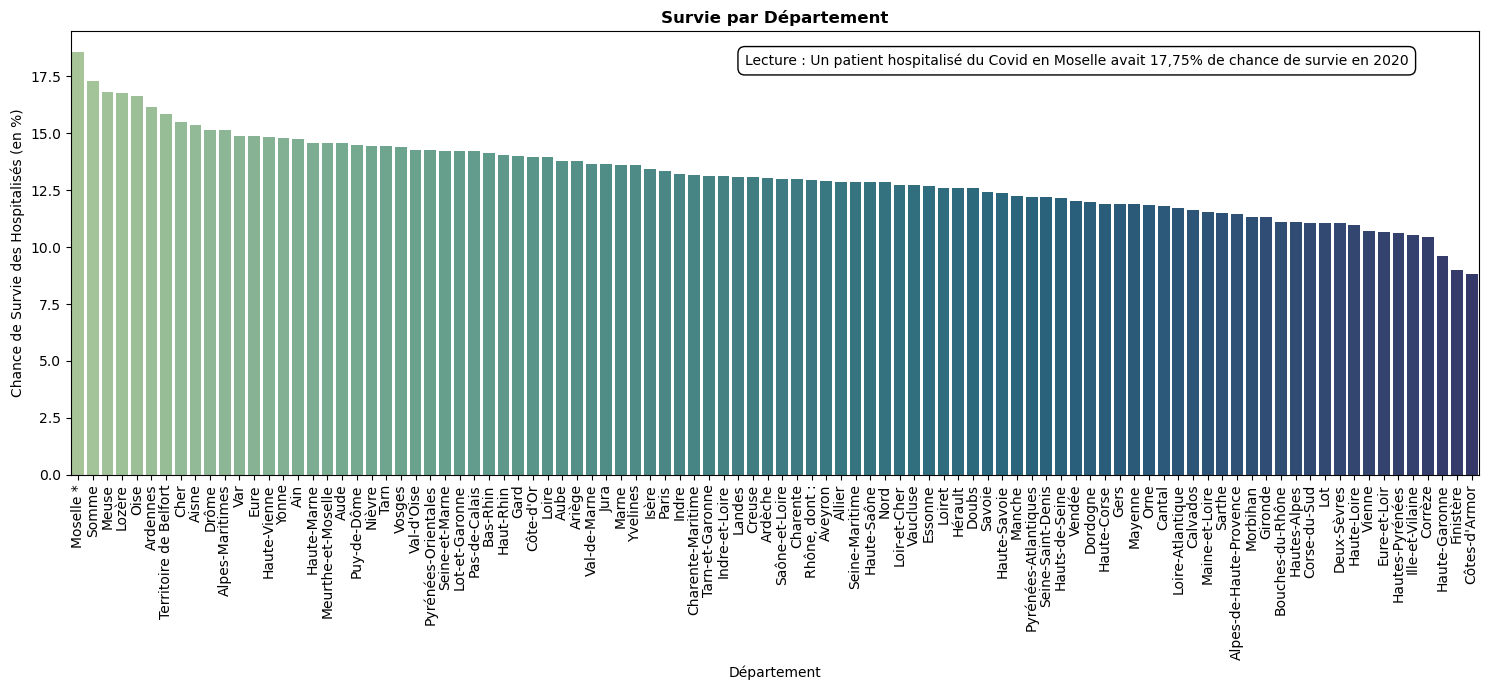

In [30]:
""" Représentons par un barplot les différentes chances de survie à une hospitalisation de la Covid selon le département d'hospitalisation"""
df_visu["chance_de_survie"] = ((df_visu["nb hospitalisations"]/df_visu["nb deces"])**-1)*100
sort_chance_de_survie = df_visu.sort_values(by = "chance_de_survie", ascending=False)

plt.figure(figsize=(15,7))
ax=sns.barplot(x="nom_dep", y="chance_de_survie", data=sort_chance_de_survie,palette = "crest")
plt.xticks(rotation=90)
plt.title("Survie par Département", fontweight='bold')
plt.xlabel("Département")
plt.ylabel("Chance de Survie des Hospitalisés (en %)")

# on insère la légende :
# ajout de l'asterisque 
labels = ax.get_xticklabels()
labels[0] = labels[0].get_text() + ' *' 
ax.set_xticklabels(labels)

# Ajout de la légende
plt.text(0.95, 0.95, 'Lecture : Un patient hospitalisé du Covid en Moselle avait 17,75% de chance de survie en 2020',
         horizontalalignment='right',
         verticalalignment='top',
         transform=ax.transAxes,
         fontsize=10,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.tight_layout()

plt.show()

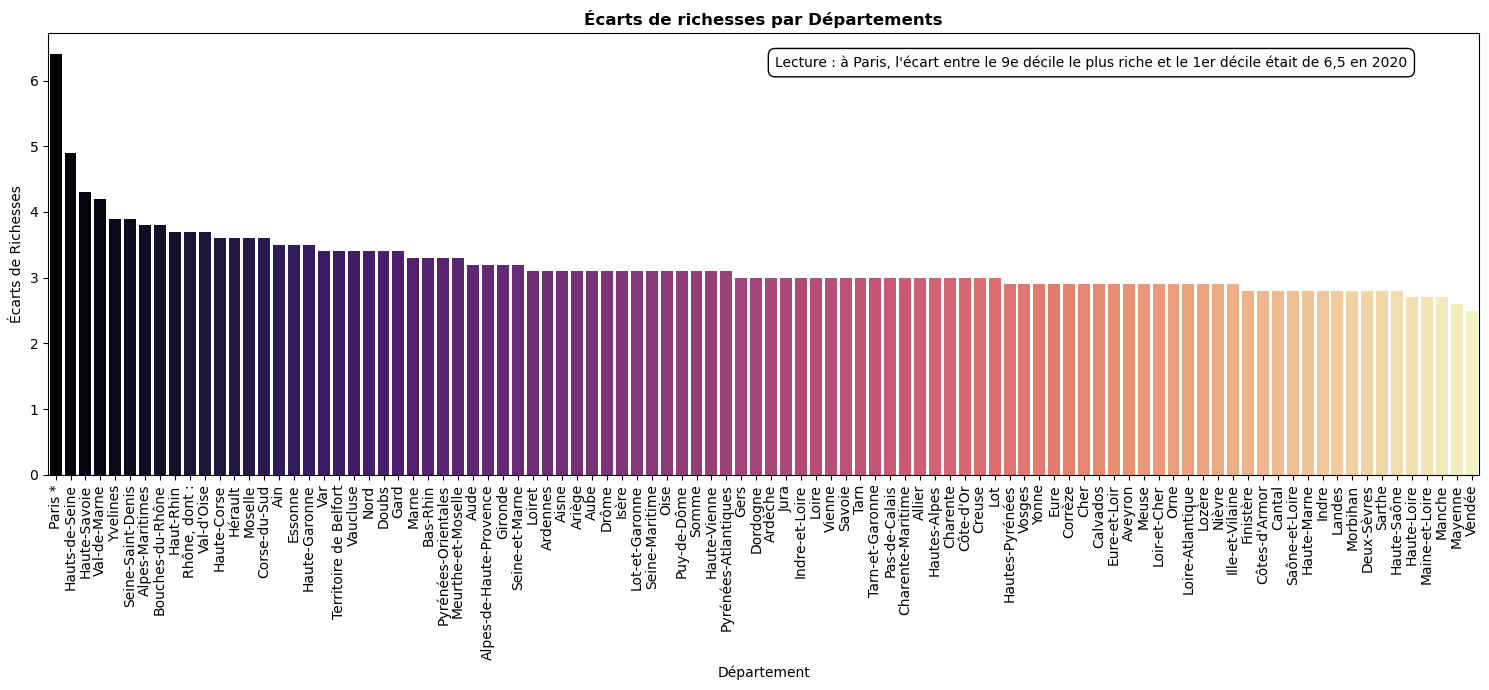

In [25]:
"""Classement des départements par rapport au niveau de vie (rapport interdécile)"""
sort_niveau_de_vie = df_visu.sort_values(by="rapport nv_vie interdécile D9/D1", ascending=False)
plt.figure(figsize=(15,7))
ax = sns.barplot(x="nom_dep", y="rapport nv_vie interdécile D9/D1", data=sort_niveau_de_vie, palette="magma")
plt.xticks(rotation=90)
plt.title("Écarts de richesses par Départements", fontweight="bold")
plt.xlabel("Département")
plt.ylabel("Écarts de Richesses")

# on insère la légende :
# ajout de l'asterisque 
labels = ax.get_xticklabels()
labels[0] = labels[0].get_text() + ' *' 
ax.set_xticklabels(labels)

# Ajout de la légende
plt.text(0.95, 0.95, 'Lecture : à Paris, l\'écart entre le 9e décile le plus riche et le 1er décile était de 6,5 en 2020',
         horizontalalignment='right',
         verticalalignment='top',
         transform=ax.transAxes,
         fontsize=10,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.tight_layout()

plt.show()


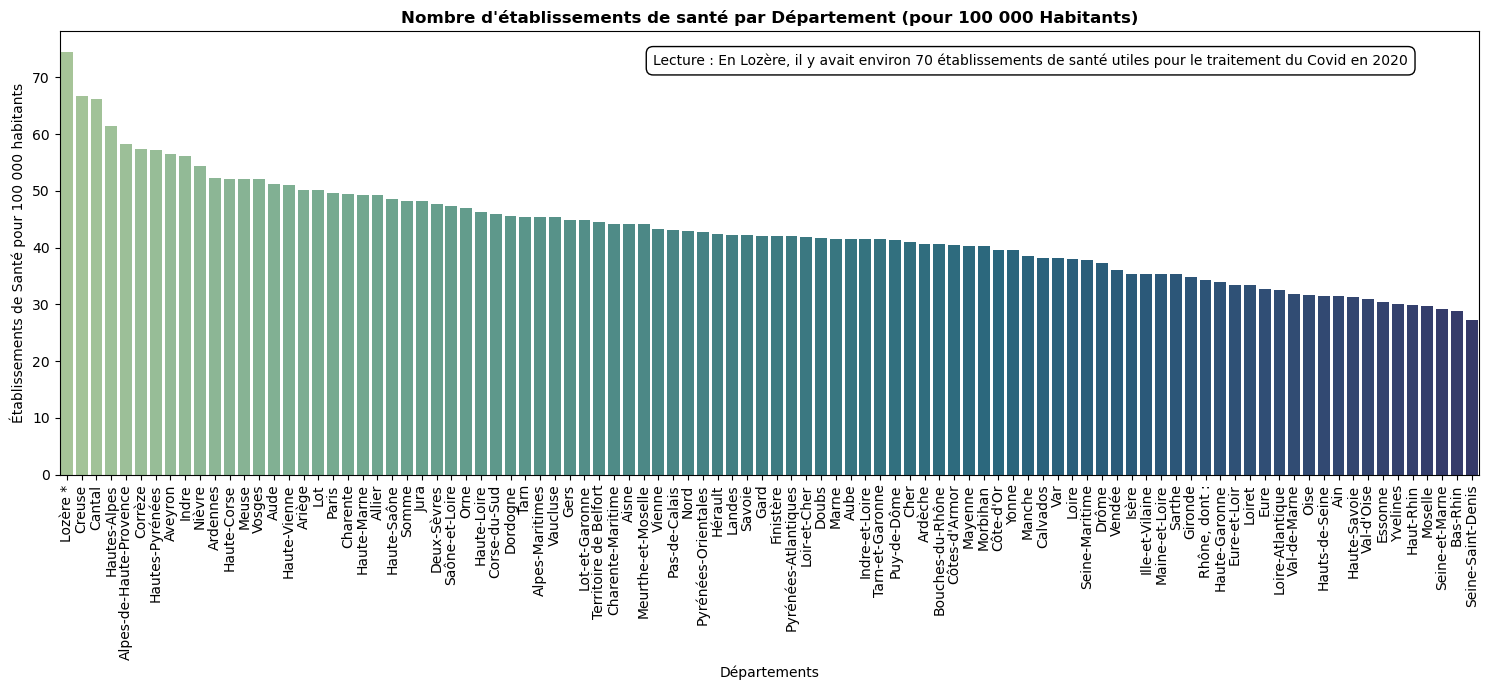

In [29]:
"""Classement des départements par rapport au nombre d'établissements de santé pour 100 000 habitants(utiles pour le soin de la Covid)"""
df_visu["etab_sante_ponderate"] = df_visu["nb_etab_sante"]/df_visu["pop_totale"]*100_000

sort_etablissement = df_visu.sort_values(by="etab_sante_ponderate", ascending=False)
plt.figure(figsize=(15,7))
ax = sns.barplot(x="nom_dep", y="etab_sante_ponderate", data=sort_etablissement, palette="crest")
plt.xticks(rotation=90)
plt.title("Nombre d\'établissements de santé par Département (pour 100 000 Habitants)", fontweight="bold")
plt.xlabel("Départements")
plt.ylabel("Établissements de Santé pour 100 000 habitants")

# on insère la légende :
# ajout de l'asterisque 
labels = ax.get_xticklabels()
labels[0] = labels[0].get_text() + ' *' 
ax.set_xticklabels(labels)

# Ajout de la légende
plt.text(0.95, 0.95, 'Lecture : En Lozère, il y avait environ 70 établissements de santé utiles pour le traitement du Covid en 2020',
         horizontalalignment='right',
         verticalalignment='top',
         transform=ax.transAxes,
         fontsize=10,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.tight_layout()

plt.show()

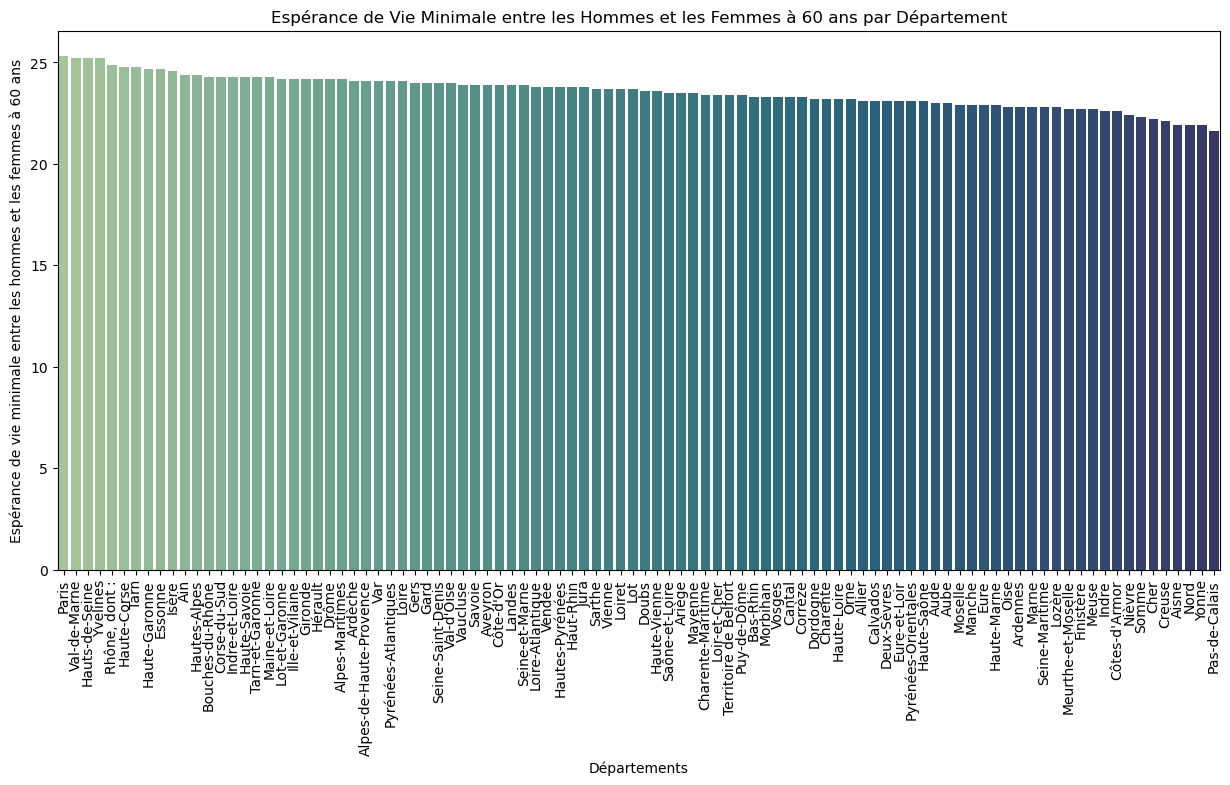

'On constate une très faible différence entre les départements'

In [10]:
"""Classement des départements par rapport à l'espérance de vie minimale à 60 ans"""
df_visu["min_esp_vie_60_ans"] = np.minimum(df_visu["esp_de_vie_F_60"], df_visu["esp_de_vie_H_60"])
sort_esp = df_visu.sort_values(by="min_esp_vie_60_ans", ascending=False)

#bar plot
plt.figure(figsize=(15,7))
sns.barplot(x="nom_dep", y="min_esp_vie_60_ans", data=sort_esp, palette="crest")
plt.xticks(rotation=90)
plt.title("Espérance de Vie Minimale entre les Hommes et les Femmes à 60 ans par Département")
plt.xlabel("Départements")
plt.ylabel("Espérance de vie minimale entre les hommes et les femmes à 60 ans")
plt.show()

"""On constate une très faible différence entre les départements"""

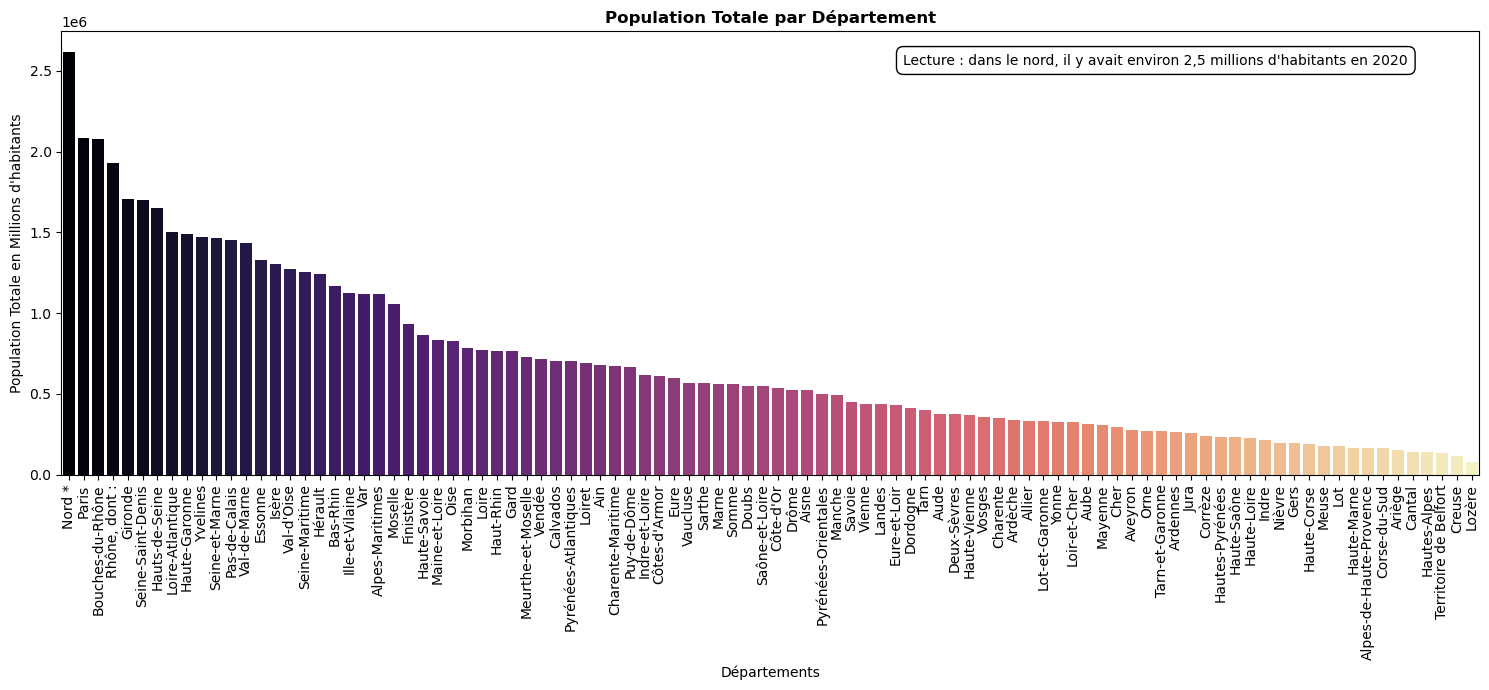

In [27]:
"""On classe maintenant les départements par popultation totale"""
sort_pop = df_visu.sort_values(by="pop_totale", ascending=False)

#bar plot
plt.figure(figsize=(15,7))
ax = sns.barplot(x="nom_dep", y="pop_totale", data=sort_pop, palette="magma")
plt.xticks(rotation=90)
plt.title("Population Totale par Département", fontweight="bold")
plt.xlabel("Départements")
plt.ylabel("Population Totale en Millions d\'habitants")

# on insère la légende :
# ajout de l'asterisque 
labels = ax.get_xticklabels()
labels[0] = labels[0].get_text() + ' *' 
ax.set_xticklabels(labels)

# Ajout de la légende
plt.text(0.95, 0.95, 'Lecture : dans le nord, il y avait environ 2,5 millions d\'habitants en 2020',
         horizontalalignment='right',
         verticalalignment='top',
         transform=ax.transAxes,
         fontsize=10,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.tight_layout()


plt.show()

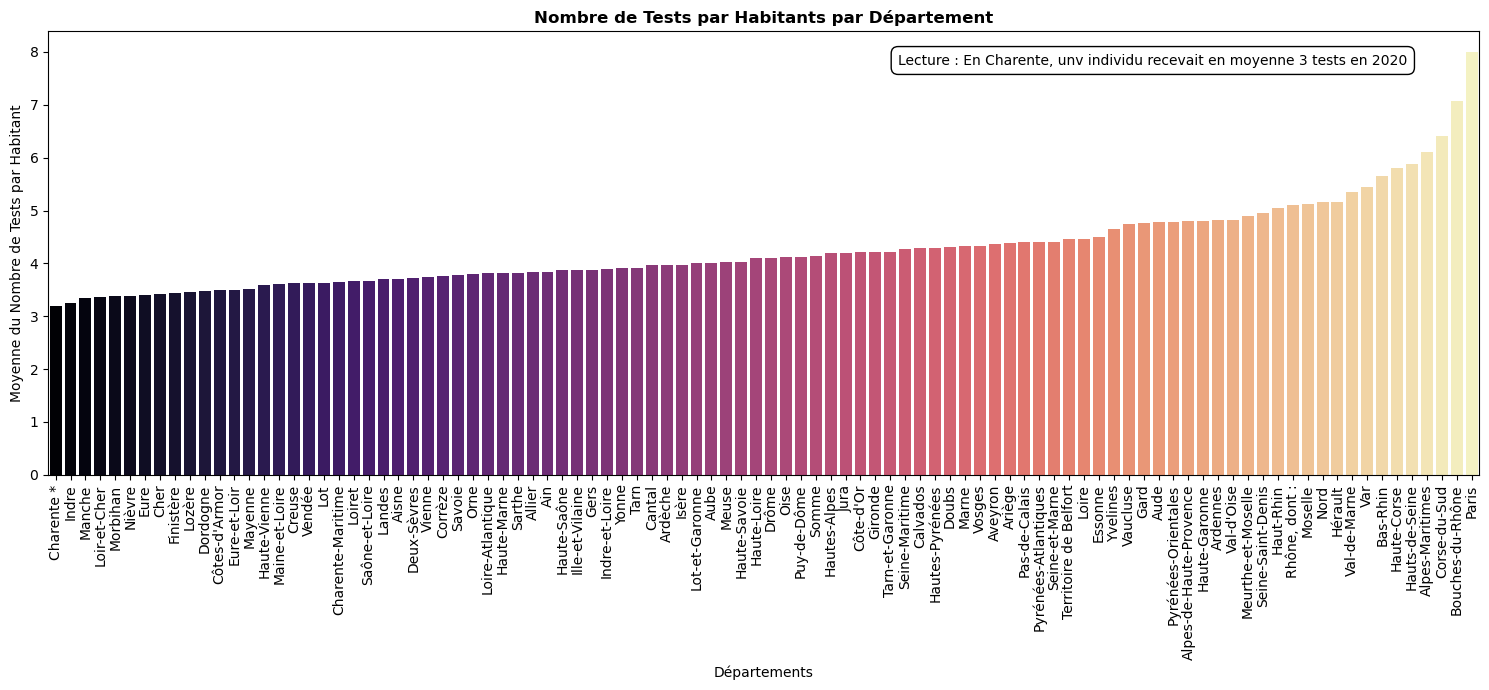

In [28]:
"""Regardons les départements qui testent le moins"""
df_visu["nb_test_par_hab"] = df_visu["ratio patients testés/population"]/100
sort_test = df_visu.sort_values(by="nb_test_par_hab", ascending=True)

#bar plot
plt.figure(figsize=(15,7))
ax = sns.barplot(x="nom_dep", y="nb_test_par_hab", data=sort_test, palette="magma")
plt.xticks(rotation=90)
plt.title("Nombre de Tests par Habitants par Département", fontweight="bold")
plt.xlabel("Départements")
plt.ylabel("Moyenne du Nombre de Tests par Habitant")

# on insère la légende :
# ajout de l'asterisque 
labels = ax.get_xticklabels()
labels[0] = labels[0].get_text() + ' *' 
ax.set_xticklabels(labels)

# Ajout de la légende
plt.text(0.95, 0.95, 'Lecture : En Charente, unv individu recevait en moyenne 3 tests en 2020',
         horizontalalignment='right',
         verticalalignment='top',
         transform=ax.transAxes,
         fontsize=10,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.tight_layout()

plt.show()

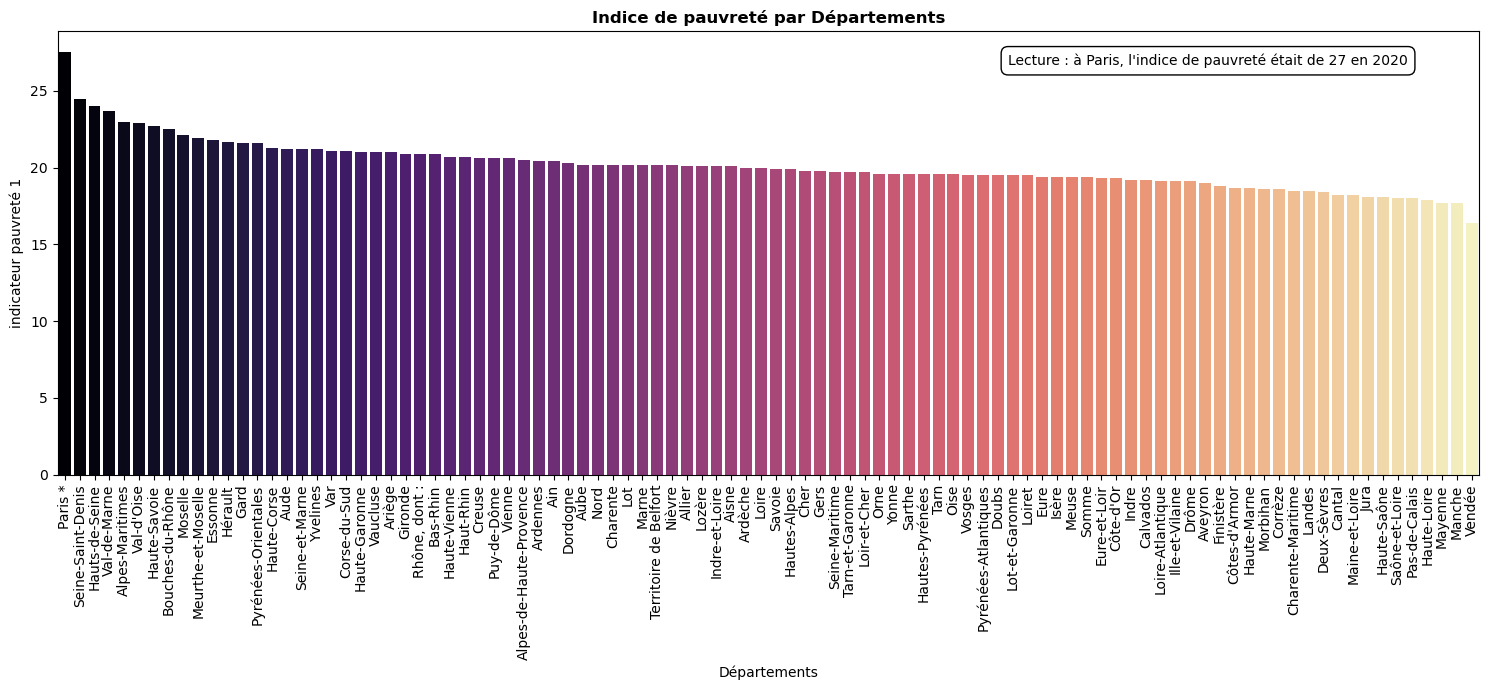

In [26]:
"""On regarde la pauvreté par départements"""
sort_poor = df_visu.sort_values(by="indicateur pauvreté 1", ascending=False)

#bar plot
plt.figure(figsize=(15,7))
ax = sns.barplot(x="nom_dep", y="indicateur pauvreté 1", data=sort_poor, palette="magma")
plt.xticks(rotation=90)
plt.title("Indice de pauvreté par Départements", fontweight="bold")
plt.xlabel("Départements")

# on insère la légende :
# ajout de l'asterisque 
labels = ax.get_xticklabels()
labels[0] = labels[0].get_text() + ' *' 
ax.set_xticklabels(labels)

# Ajout de la légende
plt.text(0.95, 0.95, 'Lecture : à Paris, l\'indice de pauvreté était de 27 en 2020',
         horizontalalignment='right',
         verticalalignment='top',
         transform=ax.transAxes,
         fontsize=10,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.tight_layout()

plt.show()

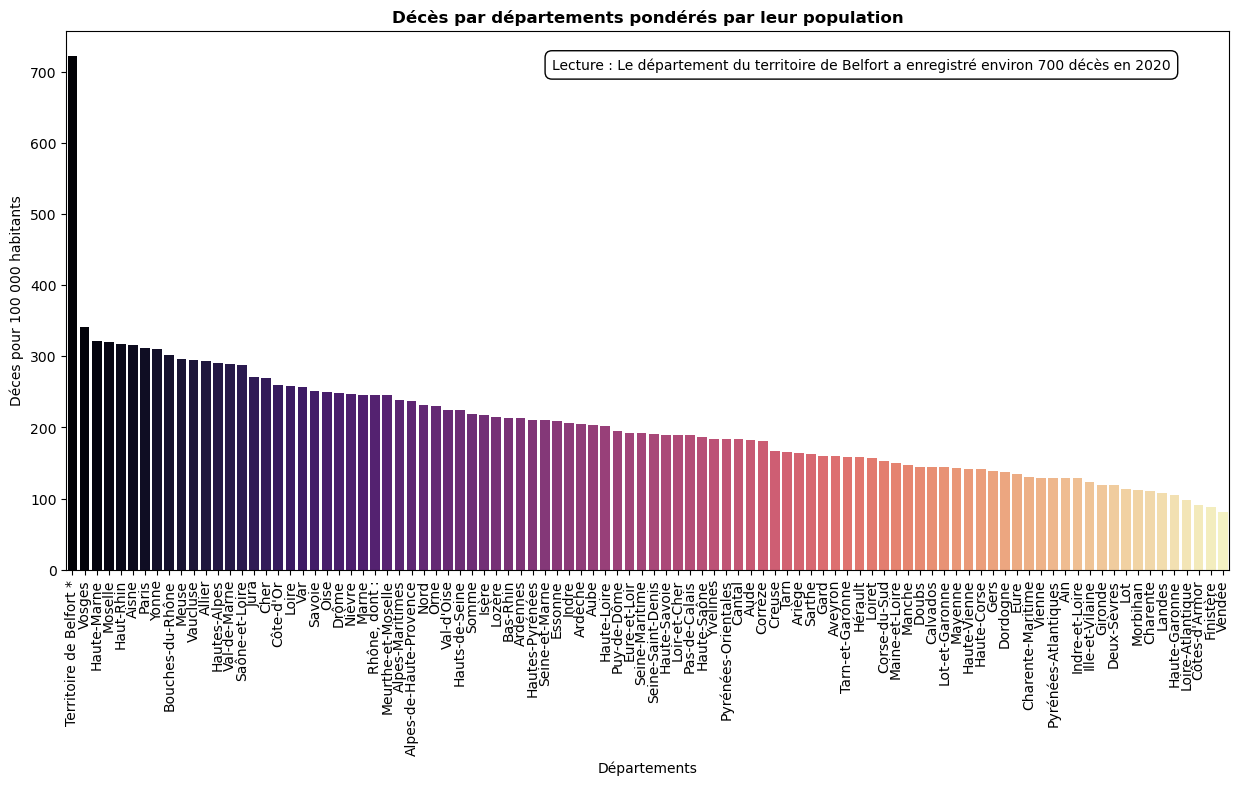

In [22]:
""" Nombre de décès par rapport à la population totale"""

df_visu["deces_pond"] = df_visu["nb deces"]/df_visu["pop_totale"]*100_000
sort_dies = df_visu.sort_values(by="deces_pond", ascending=False)

#bar plot
plt.figure(figsize=(15,7))
ax=sns.barplot(x="nom_dep", y="deces_pond", data=sort_dies, palette="magma")
plt.xticks(rotation=90)
plt.title("Décès par départements pondérés par leur population", fontweight='bold')
plt.xlabel("Départements")
plt.ylabel("Déces pour 100 000 habitants")
# on insère la légende :
# ajout de l'asterisque 
labels = ax.get_xticklabels()
labels[0] = labels[0].get_text() + ' *' 
ax.set_xticklabels(labels)

# Ajout de la légende
plt.text(0.95, 0.95, 'Lecture : Le département du territoire de Belfort a enregistré environ 700 décès en 2020',
         horizontalalignment='right',
         verticalalignment='top',
         transform=ax.transAxes,
         fontsize=10,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))


plt.show()



In [15]:
df_final.sort_values(by="pop_totale").head() 

,nom_dep,Moins de 20 ans,Moins de 25 ans,25 à 64 ans,65 ans ou plus,75 ans ou plus,80 ans ou plus,85 ans ou plus,pop_totale,Moins de 20 ans.1,Moins de 25 ans.1,25 à 64 ans.1,65 ans ou plus.1,75 ans ou plus.1,80 ans ou plus.1,85 ans ou plus.1,nb hospitalisations,nb deces,espérance de vie,passage_urg_corona,nb_etab_sante,esp_de_vie_H_60,esp_de_vie_F_60,esp_de_vie_H_65,esp_de_vie_F_65,rapport nv_vie interdécile D9/D1,indicateur pauvreté 1,indicateur pauvreté 2,patients positifs,patients testés,ratio patients positifs/population,ratio patients positifs/testés,ratio patients testés/population,ratio population/etab
num_dep,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
48,Lozère,15351.0,18944.0,36569.0,21134.0,10151.0,5952.0,3450.0,76647.0,20.028181,24.715905,47.710935,27.573160,13.243832,7.765470,4.501155,977,164,128.7,512.0,57,22.8,27.6,18.9,23.1,2.9,20.1,19.8,40715.0,265447.0,53.120148,15.338278,346.324057,1344.684211
23,Creuse,20409.0,24922.0,52219.0,36781.0,17963.0,10614.0,6367.0,113922.0,17.914889,21.876372,45.837503,32.286126,15.767806,9.316901,5.588912,1452,190,170.5,770.0,76,22.1,27.0,18.3,22.7,3.0,20.6,21.2,57178.0,413028.0,50.190481,13.843614,362.553326,1498.973684
90,Territoire de Belfort,31648.0,40315.0,67178.0,29742.0,14187.0,8385.0,4848.0,137235.0,23.061172,29.376617,48.951069,21.672314,10.337742,6.109957,3.532627,6248,990,85.2,1940.0,61,23.4,26.5,19.6,22.1,3.4,20.2,20.6,77633.0,611087.0,56.569388,12.704083,445.285095,2249.754098
05,Hautes-Alpes,27874.0,33506.0,68377.0,39778.0,19651.0,11323.0,6406.0,141661.0,19.676552,23.652240,48.268048,28.079711,13.871849,7.993026,4.522063,3710,412,124.9,1676.0,87,24.4,28.6,20.4,24.2,3.0,19.9,19.6,82765.0,593457.0,58.424690,13.946251,418.927581,1628.287356
15,Cantal,26501.0,32467.0,68060.0,43040.0,20955.0,12350.0,7266.0,143567.0,18.458977,22.614528,47.406437,29.979034,14.595973,8.602255,5.061052,2228,263,153.8,818.0,95,23.3,26.7,19.3,22.4,2.8,18.2,19.0,75023.0,569388.0,52.256438,13.176077,396.600890,1511.231579


In [16]:


df_final_corr = df_final[["pop_totale",
 'Moins de 20 ans.1',
 'Moins de 25 ans.1',
 '25 à 64 ans.1',
 '65 ans ou plus.1',
 '75 ans ou plus.1',
 '80 ans ou plus.1',
 '85 ans ou plus.1',
 'nb hospitalisations',
 'nb deces',
 'espérance de vie',
 'passage_urg_corona',
 'nb_etab_sante',
 'esp_de_vie_H_60',
 'esp_de_vie_F_60',
 'esp_de_vie_H_65',
 'esp_de_vie_F_65',
 'rapport nv_vie interdécile D9/D1',
 'indicateur pauvreté 1',
 'indicateur pauvreté 2',
 "ratio patients positifs/population",
 'ratio patients positifs/testés',
 'ratio patients testés/population']]

Matrice de corrélation des variables

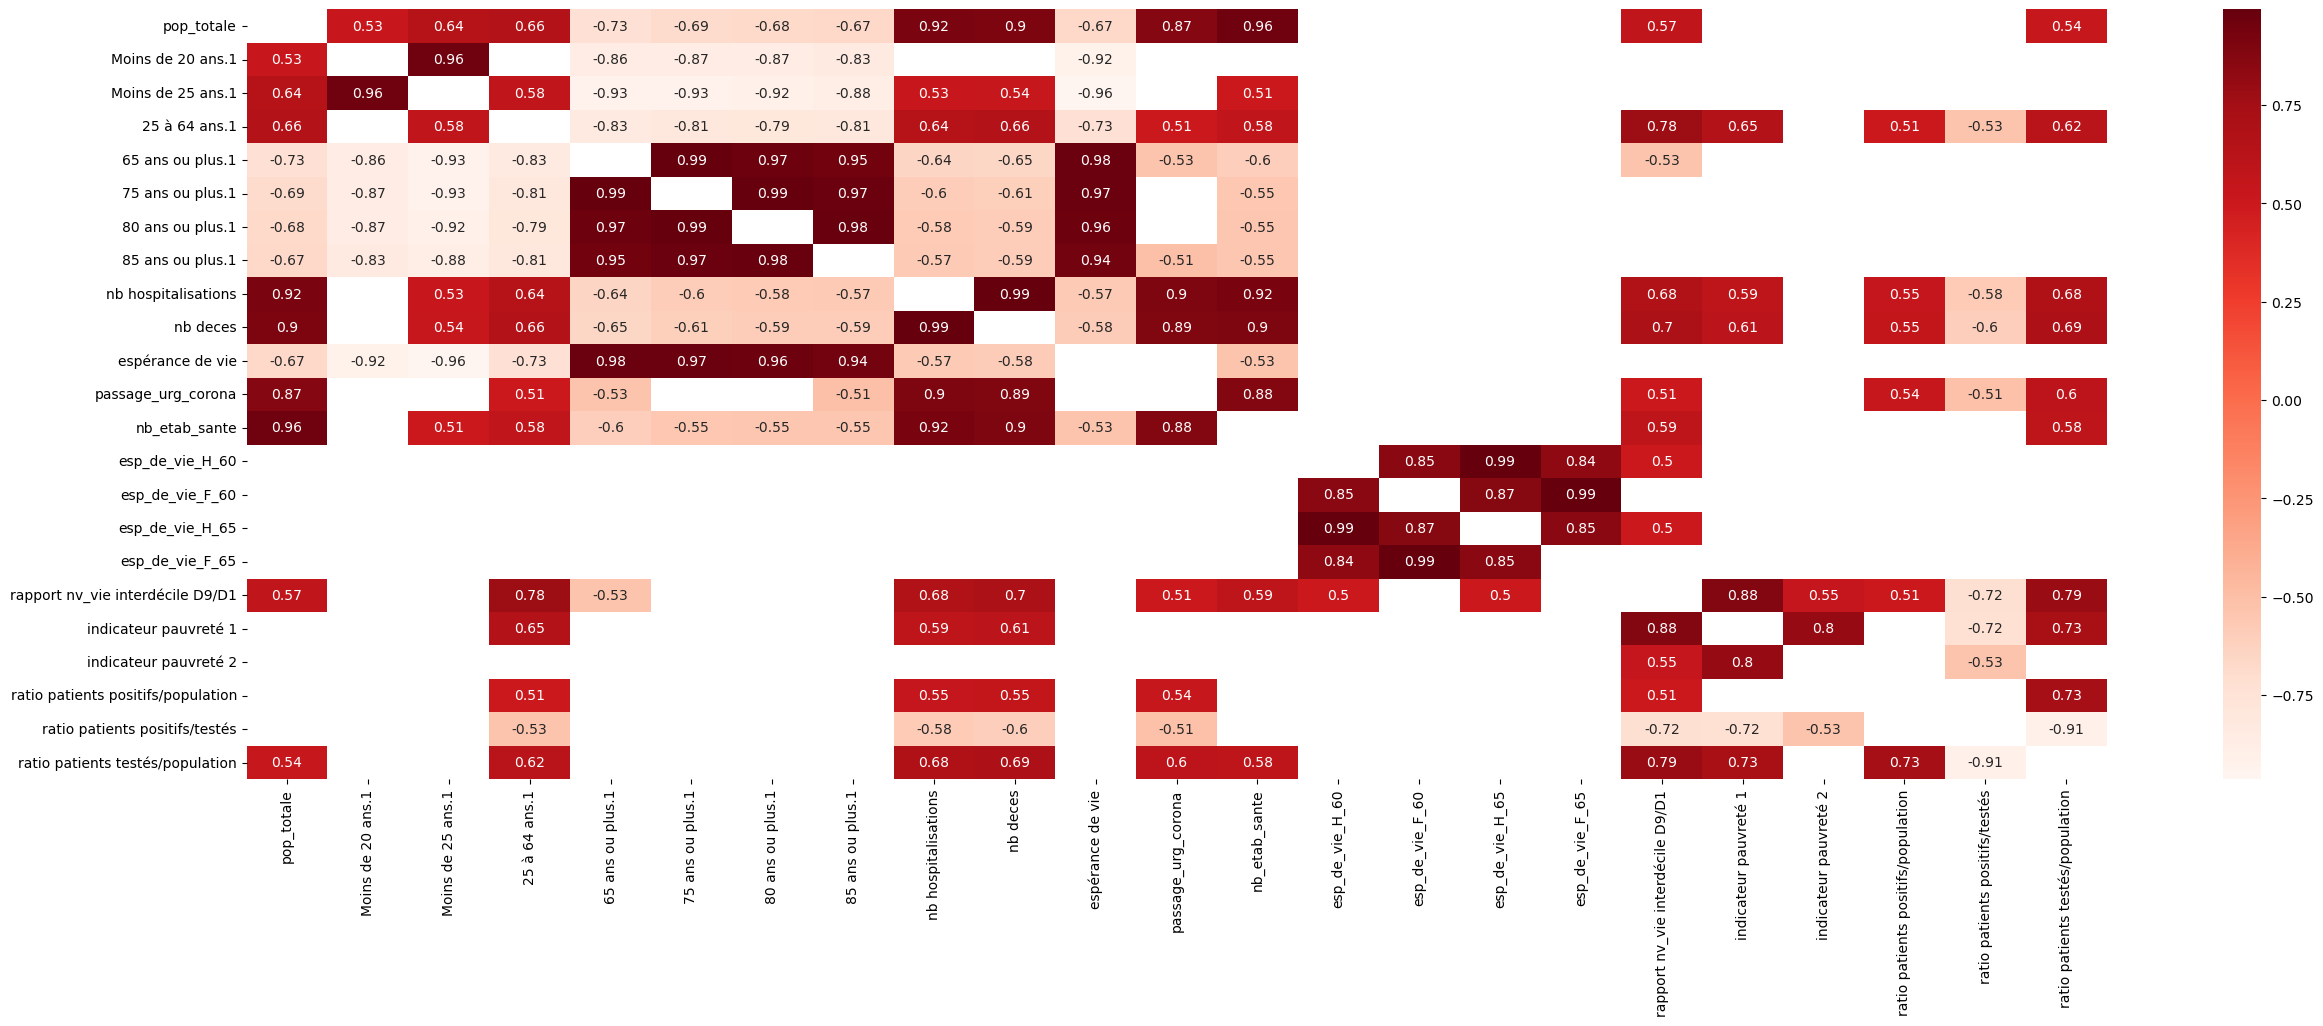

In [18]:
dfCorr = df_final_corr.corr(method="pearson", numeric_only=True)
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()


# corrélation entre nb établissements de santé et taux de dépistage mais pas entre nb établissements de santé/habitant
# et ce même taux


<Axes: xlabel='ratio patients testés/population', ylabel='indicateur pauvreté 1'>

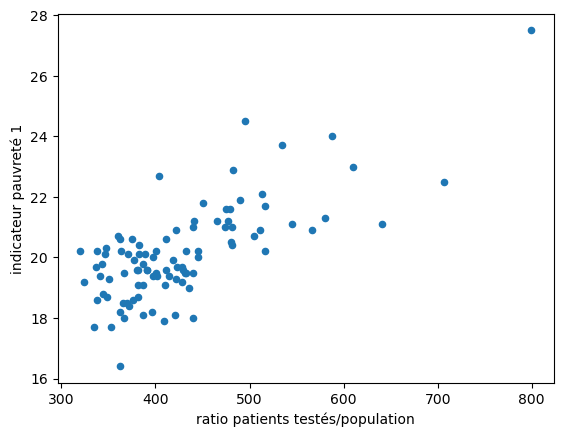

In [19]:
df_final.plot.scatter(x="ratio patients testés/population", 
y = "indicateur pauvreté 1")


Les départements ayant une plus grande part de population pauvre est corrélée à un plus grand nombre de décès liés au covid. Cela est peut-être dû au fait que les personnes plus pauvres sont plus susceptibles d'avoir des maladies qui se seraient accumulées avec le covid.
ref : https://www.inegalites.fr/Les-plus-pauvres-sont-plus-concernes-par-les-maladies-graves-de-longue-duree


<Axes: xlabel='nb deces', ylabel='indicateur pauvreté 1'>

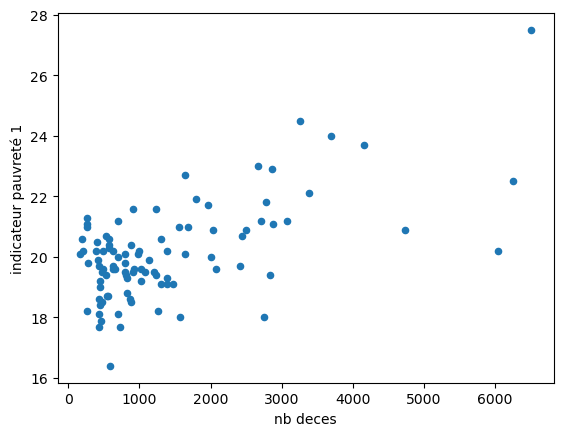

In [20]:
df_final.plot.scatter(x="nb deces", 
y = "indicateur pauvreté 1")


In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(df_final_corr)

pca.components_


array([[ 9.99832869e-01,  2.17193260e-06,  3.42966799e-06,
         2.30638737e-06, -5.73605536e-06, -2.87240789e-06,
        -1.72330138e-06, -1.02645819e-06,  1.75692892e-02,
         2.22568665e-03, -3.43269880e-05,  4.52417849e-03,
         3.51313595e-04,  4.66530109e-07,  3.60235775e-07,
         4.12920879e-07,  3.11753947e-07,  5.49736681e-07,
         1.49199317e-06,  4.10286175e-07,  3.35767167e-06,
        -1.41736092e-06,  8.38741419e-05],
       [-1.82322199e-02, -1.00644867e-04, -1.00721811e-04,
         3.34958567e-05,  6.72259540e-05,  5.15562863e-05,
         3.86673464e-05,  2.16930088e-05,  9.75968869e-01,
         1.25459007e-01,  6.62286034e-04,  1.76940732e-01,
         4.57924727e-03,  9.14685789e-06, -6.04568475e-06,
         7.97336401e-06, -5.43007780e-06,  4.46584562e-05,
         1.28796464e-04,  8.63951588e-05,  3.68659631e-04,
        -1.28160915e-04,  9.09670427e-03]])